In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as smp
import matplotlib.animation
from matplotlib.animation import PillowWriter
from scipy.integrate import odeint

In [2]:
mu=132.712438e18
t0=0
R_earth=1.49870e11
R_mars=1.49870e11 * 1.524
V_earth=np.sqrt(mu/R_earth)
V_mars=np.sqrt(mu/R_mars)
T_earth=2*np.pi*R_earth/np.sqrt(mu/R_earth)
T_mars=2*np.pi*R_mars/np.sqrt(mu/R_mars)
w_earth=2*np.pi/T_earth
w_mars=2*np.pi/T_mars

In [3]:
th=np.pi*np.sqrt(((R_earth+R_mars)**3)/(8*mu))
w2=np.sqrt(mu/(R_mars**3))
w0=np.pi-w2*th

In [4]:
print('Angle for transfer:',w0*57.2958)

Angle for transfer: 44.36116962247259


In [5]:
x_earth=R_earth*np.cos(w_earth*t0)
y_earth=R_earth*np.sin(w_earth*t0)
x_mars=R_mars*np.cos(w_mars*t0+w0)
y_mars=R_mars*np.sin(w_mars*t0+w0)

In [6]:
r1=[x_earth,y_earth]

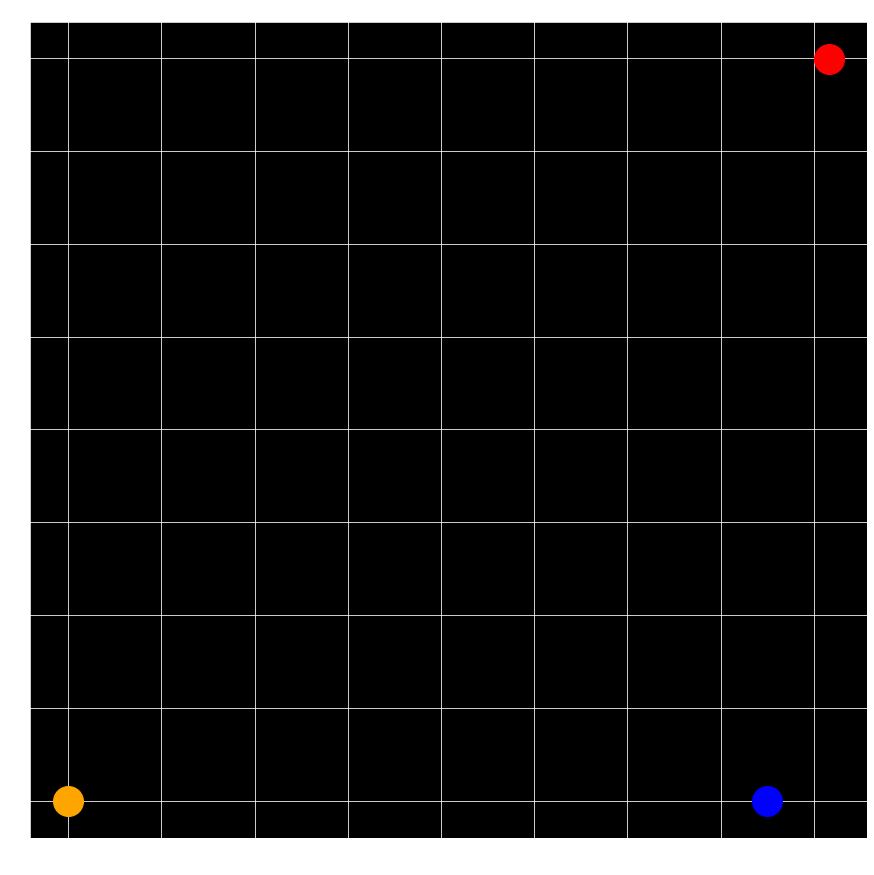

In [7]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(15, 15))
plt.title('Starting position')
plt.grid()
plt.plot(0,0,marker="o", markersize=30,c='orange')
plt.plot(x_earth,y_earth,marker="o", markersize=30,c='blue')
plt.plot(x_mars,y_mars,marker="o", markersize=30,c='red')
plt.show()

In [8]:
dV1=np.sqrt(mu/R_earth)*(np.sqrt(2*R_mars/(R_earth+R_mars))-1)
v1=[0,V_earth+dV1]
f=[(r1[0]*(v1[1]**2))-(r1[1]*v1[0]*v1[1])-((mu*r1[0])/np.sqrt((r1[0]**2)+(r1[1]**2))),(-r1[0]*v1[1]*v1[0])+(r1[1]*(v1[0]**2))-(mu*r1[1]/np.sqrt(r1[0]**2+r1[1]**2))]
p=(r1[0]*v1[1]-r1[1]*v1[0])**2/mu
e=np.sqrt(f[0]**2+f[1]**2)/mu
e

0.20760697305863704

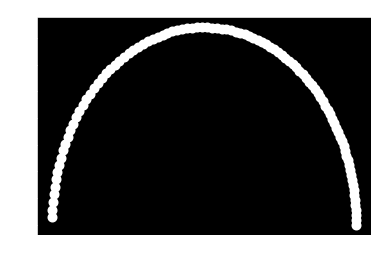

In [9]:
theta=np.arange(0,np.pi,np.pi/100)
r=[]
rx,ry=[],[]
for tt in theta:
    r.append(p/(1+e*np.cos(tt)))
    rx.append((p/(1+e*np.cos(tt)))*np.cos(tt))
    ry.append((p/(1+e*np.cos(tt)))*np.sin(tt))
plt.scatter(rx,ry,c="w",linewidth=4.0)
plt.show()

In [10]:
x=smp.symbols('x')
expr=smp.Eq(smp.tan((np.pi*0.999999)/2),smp.tan(x/2)*(smp.sqrt((1+e)/(1-e))))
E=smp.solve(expr)

In [11]:
t=((p/(1-e**2))**(3/2))/np.sqrt(mu)*(float(E[0])-e*np.sin(float(E[0])))
print('Time of transfer:',t*1.15741e-5,'days')

Time of transfer: 259.6221458585558 days


In [12]:
xe=[]
ye=[]
xm=[]
ym=[]
for tt in range(0,int(t),int(86400*2.599)):
    xe.append(R_earth*np.cos(w_earth*(tt)))
    ye.append(R_earth*np.sin(w_earth*(tt)))
    xm.append(R_mars*np.cos(w_mars*(tt)+w0))
    ym.append(R_mars*np.sin(w_mars*(tt)+w0))

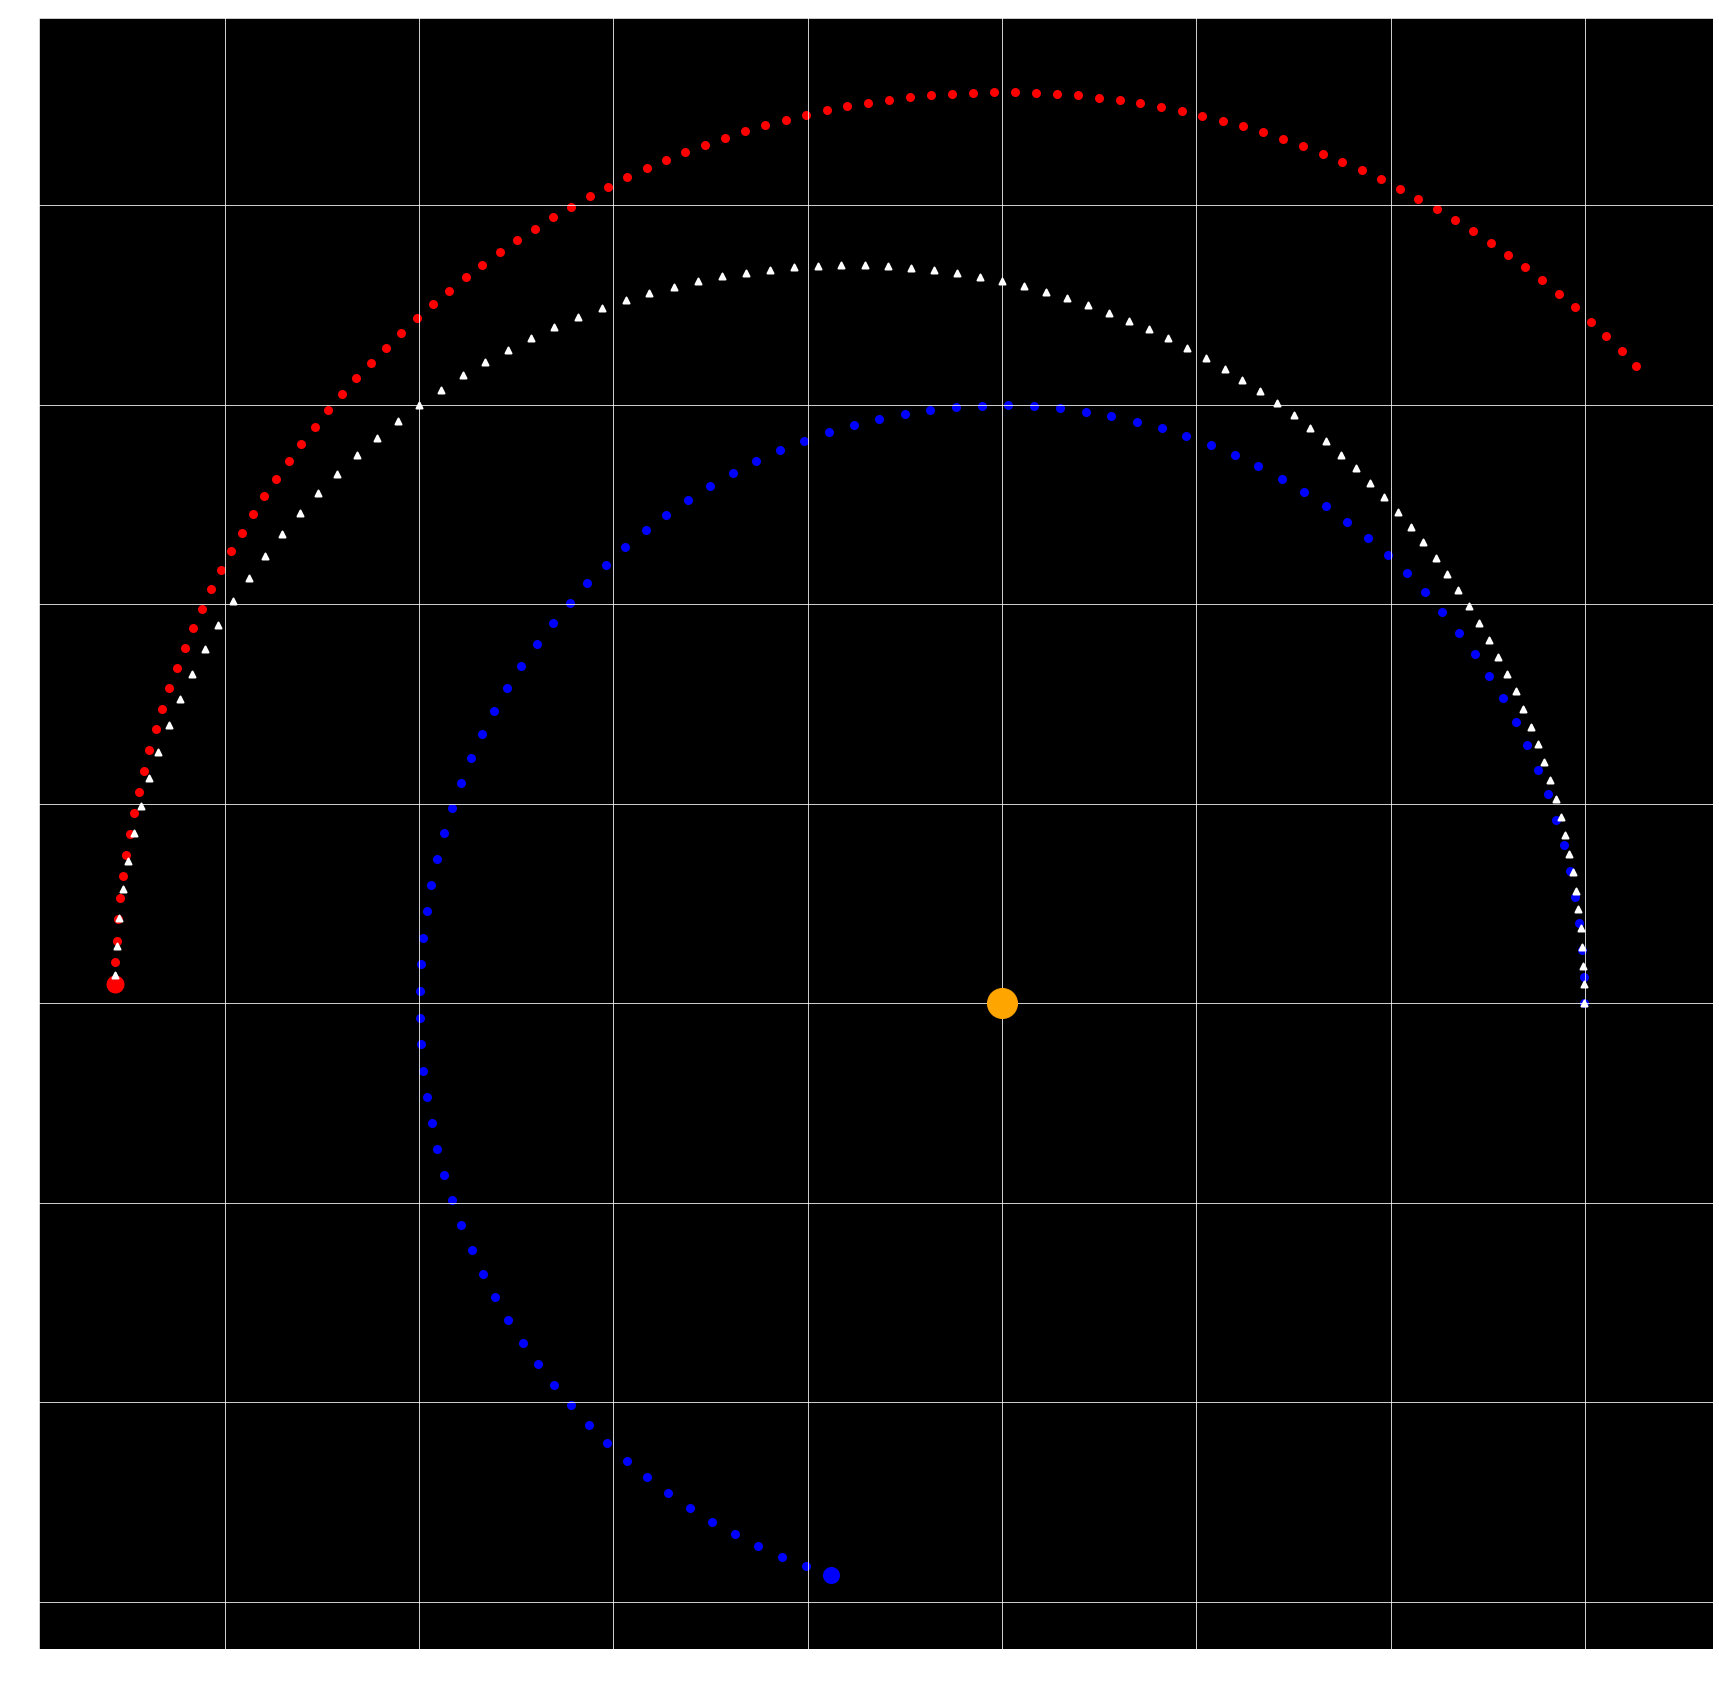

In [13]:
fig = plt.figure(figsize=(30, 30))
plt.grid()
plt.plot(0,0,marker="o", markersize=30,c='orange')
plt.scatter(xe,ye,marker="o", c='blue',linewidth=3.0)
plt.scatter(xe[-1],ye[-1],marker="o", c='blue',linewidth=11.0)
plt.scatter(xm,ym,marker="o", c='red',linewidth=3.0)
plt.scatter(xm[-1],ym[-1],marker="o", c='red',linewidth=12.0)
plt.scatter(rx,ry,c="w",marker="^",linewidth=2.0)
plt.show()

In [14]:
'''fig = plt.figure(figsize=(30, 30))
plt.grid()
plt.xlim([-R_mars*1.1, R_mars*1.1])
plt.ylim([-R_mars*1.1, R_mars*1.1])
def animate(i):
    plt.plot(0,0,marker="o", markersize=30,c='orange')
    plt.scatter(xe[i],ye[i],marker="o", c='blue',linewidth=3.0)
    plt.scatter(xm[i],ym[i],marker="o", c='red',linewidth=3.0)
    plt.scatter(rx[i],ry[i],c="w",marker="^",linewidth=2.0)
anim = matplotlib.animation.FuncAnimation(fig, animate)
anim.save("hohmann.gif",writer=PillowWriter())'''

'fig = plt.figure(figsize=(30, 30))\nplt.grid()\nplt.xlim([-R_mars*1.1, R_mars*1.1])\nplt.ylim([-R_mars*1.1, R_mars*1.1])\ndef animate(i):\n    plt.plot(0,0,marker="o", markersize=30,c=\'orange\')\n    plt.scatter(xe[i],ye[i],marker="o", c=\'blue\',linewidth=3.0)\n    plt.scatter(xm[i],ym[i],marker="o", c=\'red\',linewidth=3.0)\n    plt.scatter(rx[i],ry[i],c="w",marker="^",linewidth=2.0)\nanim = matplotlib.animation.FuncAnimation(fig, animate)\nanim.save("hohmann.gif",writer=PillowWriter())'